In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from scipy import stats
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


In [149]:
number_of_trees = 50


In [150]:
test_depths = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 30]
without_depths_limitation = [None]

for_testing_height = [2, 4, 6, 9, 15]
for_testing_max_height = [9, 12, 15, 17, 18, 19, 21, 24, 27]


In [151]:
all_files = [f'{file_num:02d}' for file_num in range(1, 22)]

with_max_height = ['02', '12', '14', '19', '21']
with_min_height = ['08', '11', '15', '16']


In [152]:
def get_data(name):
    train_data = pd.read_csv(name)
    X_train = train_data.values[:,:-1]
    Y_train = train_data.values[:,-1]

    return X_train, Y_train


In [153]:
def build_forest(X, Y, tree_depth):
    n = X.shape[0]
    trees = []

    for i in range(number_of_trees):
        tree1 = DecisionTreeClassifier(
            criterion='gini',
            max_depth=tree_depth,

            splitter='random',
            # max_features='sqrt',
            # splitter='best',
        )

        random_choice = np.random.randint(n, size=n)
        X1 = X[random_choice]
        Y1 = Y[random_choice]

        tree1.fit(X1, Y1)
        trees.append(tree1)

    def predict(Q):
        predicted_classes = np.array(list(map(lambda tree: tree.predict(Q), trees)))
        most_common_class = stats.mode(predicted_classes).mode[0]
        return most_common_class

    return predict


In [154]:
def processing(test_number, depths):
    X_train, Y_train = get_data(f'data/{test_number}_train.csv')
    X_test, Y_test = get_data(f'data/{test_number}_test.csv')

    accuracies_test = []
    accuracies_train = []

    for depth in depths:
        trained_model = build_forest(X_train, Y_train, depth)

        Y_predicted_train = trained_model(X_train)
        Y_predicted_test = trained_model(X_test)

        accuracy_train = metrics.accuracy_score(Y_train, Y_predicted_train)
        accuracy_test = metrics.accuracy_score(Y_test, Y_predicted_test)

        accuracies_train.append(accuracy_train)
        accuracies_test.append(accuracy_test)

        print('Test', test_number, ':', 'depth', depth)
        print('\t accuracy train', accuracy_train)
        print('\t accuracy test', accuracy_test)

    if len(depths) >= 2:
        plt.title('sample ' + test_number + ' train')
        plt.plot(depths, accuracies_train, marker='o')
        plt.show()

        plt.title('sample ' + test_number + ' test')
        plt.plot(depths, accuracies_test, marker='o')
        plt.show()


In [155]:
# 01 09 15 17


Test 19 : depth 1
	 accuracy train 0.3285821455363841
	 accuracy test 0.3345836459114779
Test 19 : depth 2
	 accuracy train 0.3743435858964741
	 accuracy test 0.3698424606151538
Test 19 : depth 3
	 accuracy train 0.45161290322580644
	 accuracy test 0.45236309077269315
Test 19 : depth 4
	 accuracy train 0.4988747186796699
	 accuracy test 0.5071267816954238
Test 19 : depth 5
	 accuracy train 0.5033758439609902
	 accuracy test 0.5078769692423106
Test 19 : depth 6
	 accuracy train 0.5693923480870218
	 accuracy test 0.5438859714928732
Test 19 : depth 7
	 accuracy train 0.6496624156039009
	 accuracy test 0.5918979744936234
Test 19 : depth 8
	 accuracy train 0.7719429857464366
	 accuracy test 0.6571642910727682
Test 19 : depth 10
	 accuracy train 0.9174793698424606
	 accuracy test 0.6909227306826706
Test 19 : depth 12
	 accuracy train 0.9737434358589647
	 accuracy test 0.7299324831207802
Test 19 : depth 15
	 accuracy train 0.9984996249062266
	 accuracy test 0.735933983495874
Test 19 : depth 2

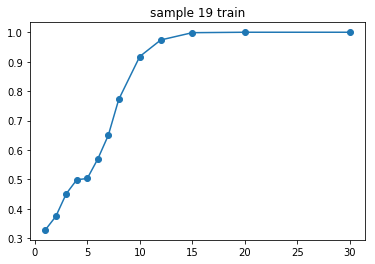

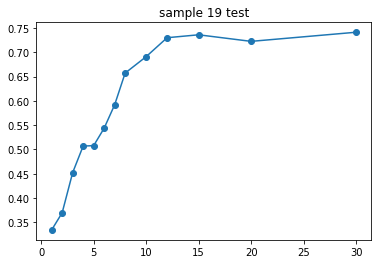

In [156]:
# with max height
processing('19', test_depths)


Test 15 : depth 1
	 accuracy train 0.8900900900900901
	 accuracy test 0.9501501501501501
Test 15 : depth 2
	 accuracy train 0.8948948948948949
	 accuracy test 0.9501501501501501
Test 15 : depth 3
	 accuracy train 0.9201201201201201
	 accuracy test 0.9735735735735735
Test 15 : depth 4
	 accuracy train 0.9201201201201201
	 accuracy test 0.9717717717717718
Test 15 : depth 5
	 accuracy train 0.9369369369369369
	 accuracy test 0.9927927927927928
Test 15 : depth 6
	 accuracy train 0.9411411411411411
	 accuracy test 0.9963963963963964
Test 15 : depth 7
	 accuracy train 0.9447447447447448
	 accuracy test 0.9987987987987988
Test 15 : depth 8
	 accuracy train 0.9465465465465466
	 accuracy test 0.9987987987987988
Test 15 : depth 10
	 accuracy train 0.9507507507507508
	 accuracy test 0.9987987987987988
Test 15 : depth 12
	 accuracy train 0.954954954954955
	 accuracy test 0.9987987987987988
Test 15 : depth 15
	 accuracy train 0.975975975975976
	 accuracy test 0.9981981981981982
Test 15 : depth 20
	

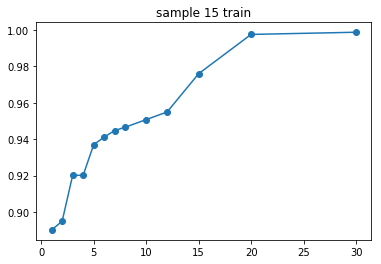

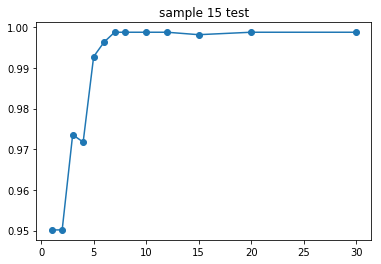

In [157]:
# with min height
processing('15', test_depths)


In [158]:
for file_name in all_files:
    processing(file_name, depths=without_depths_limitation)


Test 01 : depth None
	 accuracy train 0.9997429966589566
	 accuracy test 0.9917758930866101
Test 02 : depth None
	 accuracy train 1.0
	 accuracy test 0.5188295165394402
Test 03 : depth None
	 accuracy train 0.9990356798457087
	 accuracy test 0.9995178399228544
Test 04 : depth None
	 accuracy train 0.9996521739130435
	 accuracy test 0.9596521739130435
Test 05 : depth None
	 accuracy train 1.0
	 accuracy test 0.9935064935064936
Test 06 : depth None
	 accuracy train 0.9988962472406181
	 accuracy test 0.9884105960264901
Test 07 : depth None
	 accuracy train 1.0
	 accuracy test 0.9520930232558139
Test 08 : depth None
	 accuracy train 0.997920997920998
	 accuracy test 0.9708939708939709
Test 09 : depth None
	 accuracy train 1.0
	 accuracy test 0.7235294117647059
Test 10 : depth None
	 accuracy train 1.0
	 accuracy test 0.9830985915492958
Test 11 : depth None
	 accuracy train 0.999195171026157
	 accuracy test 0.999195171026157
Test 12 : depth None
	 accuracy train 1.0
	 accuracy test 0.847600

In [159]:
# for file_name in all_files:
#     processing(file_name, depths=for_testing_height)

# с минимальной высотой: 8, 11, 15, 16
# с максимальной высотой: 02, 12, 14, 19, 21

